In [19]:
import pandas as pd
import numpy as np
import os, fnmatch, re, cv2, random,sys, pickle
import torch
#import imgaug as ia
#import imageio
%matplotlib inline  
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from torch.utils import data
from torchvision import transforms
import torch.nn as nn
sys.path.append('..')

#root_locEm = "../"
root_datasets = "/disk/shravank/datasets/"
#root_ImageNetVidsDevkit = root_datasets+"ImageNetVids/imageNetVidsDevkit.data/"
#root_ImageNetVids = root_datasets+"ImageNetVids/imageNetVids.data/"

path_to_frames= root_datasets+"ILSVRC2015/Data/VID/train/"
path_to_val_frames= root_datasets+"ILSVRC2015/Data/VID/val/"
#path_to_annotations= root_ImageNetVids+"Annotations/VID/train/"

from genINV_Yolo_v2 import ImageNetVID
from torch.utils.data import DataLoader

image_size = 448
map_vid = pd.read_pickle("../data/map_vid.pkl")

In [2]:
def collate_fn(data):

    '''print("TYPE DATA COLLATE",type(data))
    print("LEN DATA COLLATE",len(data))
    print("type data[0]",type(data[0][0]))
    print("type data[1]",type(data[0][1]))
    print("type data[2]",type(data[0][2]))'''

    #sys.exit(0)
    '''images = torch.tensor(np.transpose(data[0][0],(2,0,1)))
    bboxes = torch.tensor(data[0][1])'''

    n = len(data[0])
    out = []

    for i in range(n):
        out.append(data[0][i])

    return out

In [3]:
train_dataset = "../data/metadata_imgnet_vid_train_n2.pkl"
val_dataset = "../data/metadata_imgnet_vid_val_n2.pkl"
root_datasets = "/disk/shravank/datasets/"
gen_train = ImageNetVID(root_datasets,train_dataset,split='train',image_size=image_size,S=7,B=2,C=30,X=5)
gen_val = ImageNetVID(root_datasets,val_dataset,split='val',image_size=image_size,S=7,B=2,C=30,X=5)
train_loader = DataLoader(gen_train,batch_size=2,shuffle=True,collate_fn=collate_fn)
val_loader = DataLoader(gen_val,batch_size=2,collate_fn=collate_fn)

USING v101 of generator
Invoking augmentor
USING v101 of generator
Invoking augmentor


In [4]:
img,tgt=[],[]
for i,(img,tgt) in enumerate(train_loader):
    break

ILSVRC2015_VID_train_0002/ILSVRC2015_train_00179003
000134
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00625001
000035


In [5]:
img.shape

(360, 550, 3)

In [6]:
tgt

tensor([[111.1759,  96.0000, 504.3029, 312.0000],
        [236.1055, 142.0000, 463.0417, 306.0000]])

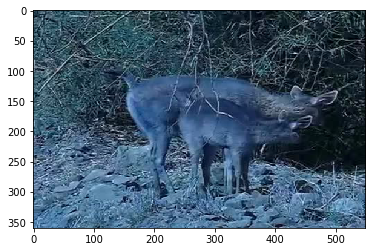

In [7]:
plt.imshow(img)

111 96 504 312
236 142 463 306


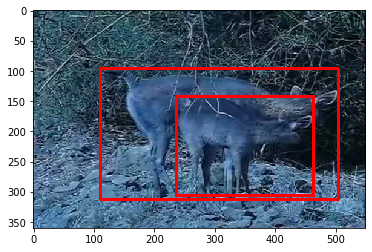

In [8]:
for b in tgt:
    #print(b.view(-1).size())
    x1,y1,x2,y2 = b.view(-1).numpy()
    x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)
    print(x1,y1,x2,y2)
    cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),3)
plt.imshow(img)

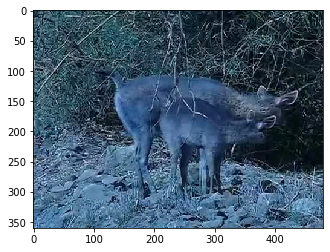

In [22]:
i1 = cv2.imread(path_to_frames+'ILSVRC2015_VID_train_0002/ILSVRC2015_train_00179003'+'/'+'000134'+'.JPEG')
plt.imshow(i1)

In [1]:
def showTorchTensorImg(img):
    
    #assert img is a torch of size nchw
    return plt.imshow(img.permute(1,2,0).numpy())

In [2]:
from genINV_Yolo_Emb_v2 import ImageNetVID_RTR
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
train_dataset = "../data/metadata_imgnet_vid_train_n2.pkl"
#best val dataset has _new
val_dataset = "../data/metadata_imgnet_vid_val_n2.pkl"
root_datasets = '/mnt/data1/shravank/datasets/'

In [23]:
image_size = 448
batch_size = 10

In [24]:
def collate_fn(data):

    '''print("TYPE DATA COLLATE",type(data))
    print("LEN DATA COLLATE",len(data))
    print("type data[0]",type(data[0][0]))
    print("type data[1]",type(data[0][1]))
    print("type data[2]",type(data[0][2]))'''

    #sys.exit(0)

    n = len(data[0])
    out = []

    for i in range(n):
        out.append(data[0][i])

    return out

In [25]:
gen_train = ImageNetVID_RTR(root_datasets,train_dataset,split='train',image_size=image_size)
gen_val = ImageNetVID_RTR(root_datasets,val_dataset,split='val',image_size=image_size)

train_loader = DataLoader(gen_train,batch_size=batch_size,shuffle=False,collate_fn=collate_fn)
val_loader = DataLoader(gen_val,batch_size=batch_size,shuffle=True)

USING v101 of generator
Invoking augmentor
USING v101 of generator
val Length of the dataset to traverse 2618
val Length of the dataset to traverse 2618


In [26]:
m,c,n = [],[],[]
for i, (sample_img,sample_class,ids) in enumerate(val_loader):
    m,c,n =sample_img,sample_class,ids
    print(type(sample_img))
    print(type(sample_class))
    print(type(ids))
    break

val Length of the dataset to traverse 2618
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [29]:
c

tensor([21, 27, 13,  0, 11, 10,  9,  8, 18, 13])

In [27]:
n

tensor([ 765,   53,  556, 1137, 1027,  348,  727,  613,  166,  674])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


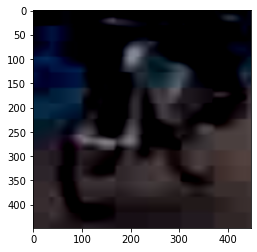

In [22]:
showTorchTensorImg(m.squeeze(0))

In [60]:
qe = []

In [62]:
qe.append(n.numpy())

In [63]:
len(qe)

2

In [64]:
import numpy as np
q = np.concatenate(qe,axis=0)

In [65]:
q.shape

(10,)

In [24]:
import pandas as pd
pd.read_pickle("../data/map_vid.pkl")

,WNID,cat_code,category_name
0,n02691156,1,airplane
1,n02419796,2,antelope
2,n02131653,3,bear
3,n02834778,4,bicycle
4,n01503061,5,bird
5,n02924116,6,bus
6,n02958343,7,car
7,n02402425,8,cattle
8,n02084071,9,dog
9,n02121808,10,domestic_cat
